Let's import the necessary libraries for our project! 🚀


In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from wordcloud import WordCloud
from langdetect import detect
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler
sns.set()
%matplotlib inline

# 📥 Load Data

In [2]:
jobpostDF = pd.read_csv('job_postings.csv')
jobpostDF.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


# 🧹 Data Cleaning


Drop Some Unnecessary Col Away

In [3]:
jobpostDF.isnull().sum()
jobpostDF = jobpostDF.dropna(subset='description')
jobpostDF = jobpostDF.loc[:,['job_id','description']]

# ✨ Text Preprocessing

### 🔄 Build Text Cleaner

In [4]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "here's": "here is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "u.s": "america",
    "e.g": "for example",
}


# Clean contraction
def clean_contractions(text):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in contraction_mapping.keys():
        if "" + word + "" in text:
            text = text.replace("" + word + "", "" + contraction_mapping[word] + "")
    return text


# Remove Url Pattern
def remove_urls(text):
    url_pattern = r"https?://\S+|www\.\S+"
    return re.sub(url_pattern, "", text)


# Remove HTML Tag
def remove_html(text):
    html_pattern = re.compile("<.*?>")
    return html_pattern.sub(r"", text)


# Remove special character "!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~"
def remove_punctuation(text):
    punctuation = string.punctuation + "–"
    return re.sub(f"[{re.escape(punctuation)}]", "", text)


# Remove E-mail pattern
def remove_emails(text):
    return re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", text)


# Remove New Line Code Snippet
def remove_code_snippet(text):
    return text.replace("\n", "")


# Remove Emoji
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)


# Remove Non-English Text
def remove_non_english_text(text):
    def is_english(text):
        try:
            return detect(text) == "en"
        except:
            return False

    return text if is_english(text) else ""


# Remove Digits
def remove_digits(text):
    return "".join(filter(lambda char: not char.isdigit(), text))


# Remove Stop Words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    custom_stop_words = [
        "job",
        "role",
        "position",
        "responsibility",
        "responsibilities",
        "duties",
        "duty",
        "requirement",
        "requirements",
        "qualification",
        "qualifications",
        "description",
        "descriptions",
        "candidate",
        "candidates",
        "applicant",
        "applicants",
        "opportunity",
        "opportunities",
        "team",
        "teams",
        "work",
        "working",
        "employee",
        "employees",
        "employer",
        "employers",
        "company",
        "companies",
        "location",
        "locations",
        "department",
        "departments",
        "report",
        "reports",
        "reporting",
        "benefit",
        "benefits",
        "compensation",
        "salary",
        "experience",
        "experienced",
        "year",
        "years",
        "gender",
        "race",
        "color",
        "sex",
        "orientation",
        "sexual",
        "religion",
        "national",
        "identify",
        "veteran",
        "nation",
        "including",
        "required",
        "disability",
        "regard"
    ]

    words = text.split()
    filtered_words = [
        word
        for word in words
        if word.lower() not in stop_words and word.lower() not in custom_stop_words
    ]
    return " ".join(filtered_words)


# Lemmatization
def lemmatize_words(text):
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return " ".join(lemmatized_words)

### 🧠 The Mighty Text Cleaner Function

In [5]:
def clean_text(text,remove_stop_words=True):
    text = text.lower()
    text = remove_urls(text)
    text = remove_emails(text)
    text = remove_html(text)
    text = clean_contractions(text)
    text = remove_code_snippet(text)
    text = remove_punctuation(text)
    text = remove_emoji(text)
    text = remove_digits(text)
    text = remove_non_english_text(text)
    text = lemmatize_words(text)
    if remove_stop_words:
        text = remove_stopwords(text)
    return text

🧼 Scrubbing Those Job Descriptions

In [6]:
jobpostDF['description_cleaned'] = jobpostDF['description'].astype(str).apply(lambda x: clean_text(x))
jobpostDF['description_cleaned_st'] = jobpostDF['description'].astype(str).apply(lambda x: clean_text(x, remove_stop_words=False))

### 📊 Word Frequency Detective Work

In [7]:
cnt = Counter()
for text in jobpostDF["description_cleaned"].values:
    for word in text.split():
        cnt[word] += 1
freqWords = set([w[0] for w in cnt.most_common(10)])
rareWords = set([w for w, freq in cnt.items() if freq == 1])

In [8]:
freqWords

{'ability',
 'business',
 'include',
 'management',
 'project',
 'provide',
 'require',
 'service',
 'skills',
 'support'}

📏 Measuring Our Text

In [9]:
def remove_freq_rare_words(text):
    preserved_words = {'management', 'project','support','service'}
    return " ".join([word for word in str(text).split() if word not in freqWords and word not in rareWords])
jobpostDF['description_cleaned'] = jobpostDF['description_cleaned'].apply(remove_freq_rare_words)

Count 'Job Description' Length and Remove text that have 0,1,2 length because it not make sense and can be empty text

In [10]:
#Count Text Lenght
#Remove Description that have 0 and 1 length
jobpostDF['original_length'] = jobpostDF['description'].str.split().apply(len)
jobpostDF['cleaned_length'] = jobpostDF['description_cleaned'].str.split().apply(len)
jobpostDF = jobpostDF[jobpostDF['cleaned_length'].isin([0,1,2])==False]

# 🖼️ Visualization of Job Description Text

### 📏 Text Length Distribution

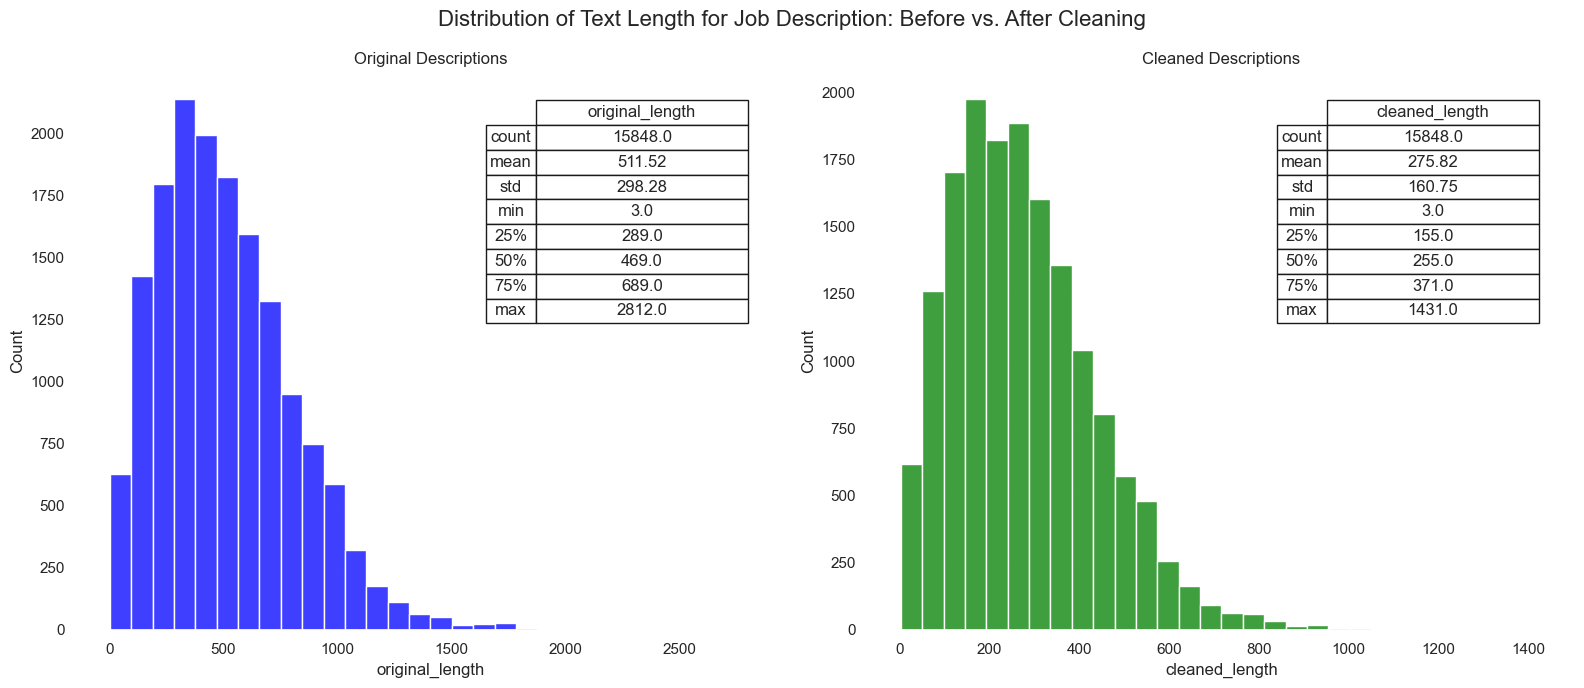

In [11]:
fig = plt.figure(figsize=(16,7), facecolor='none')  

ax1 = fig.add_subplot(121)
sns.histplot(jobpostDF['original_length'], ax=ax1, color='blue', bins=30, zorder=1)
ax1.set_title('Original Descriptions')
ax1.set_facecolor('none')


ax2 = fig.add_subplot(122)
sns.histplot(jobpostDF['cleaned_length'], ax=ax2, color='green', bins=30, zorder=1)
ax2.set_title('Cleaned Descriptions')
ax2.set_facecolor('none')


describe_original = jobpostDF.original_length.describe().to_frame().round(2)
bbox_original = [0.65, 0.55, 0.3, 0.4]
table_original = ax1.table(cellText=describe_original.values, rowLabels=describe_original.index, bbox=bbox_original, colLabels=describe_original.columns, zorder=2)
table_original.auto_set_font_size(False)
table_original.set_fontsize(12)
for key, cell in table_original.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    cell.set_height(0.2) 


describe_cleaned = jobpostDF.cleaned_length.describe().to_frame().round(2)
bbox_cleaned = [0.65, 0.55, 0.3, 0.4]
table_cleaned = ax2.table(cellText=describe_cleaned.values, rowLabels=describe_cleaned.index, bbox=bbox_cleaned, colLabels=describe_cleaned.columns, zorder=2)
table_cleaned.auto_set_font_size(False)
table_cleaned.set_fontsize(12)
for key, cell in table_cleaned.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    cell.set_height(0.2) 
    
fig.suptitle('Distribution of Text Length for Job Description: Before vs. After Cleaning', fontsize=16)
plt.tight_layout()

plt.savefig('transparent_histogram.png', transparent=True)
plt.show()

**Key Insight 🎯** <br>
The text length distribution shows how our cleaning process has affected the job descriptions. The cleaned descriptions are more consistent in length, which should help improve our model's performance!

### ☁️ Word Cloud

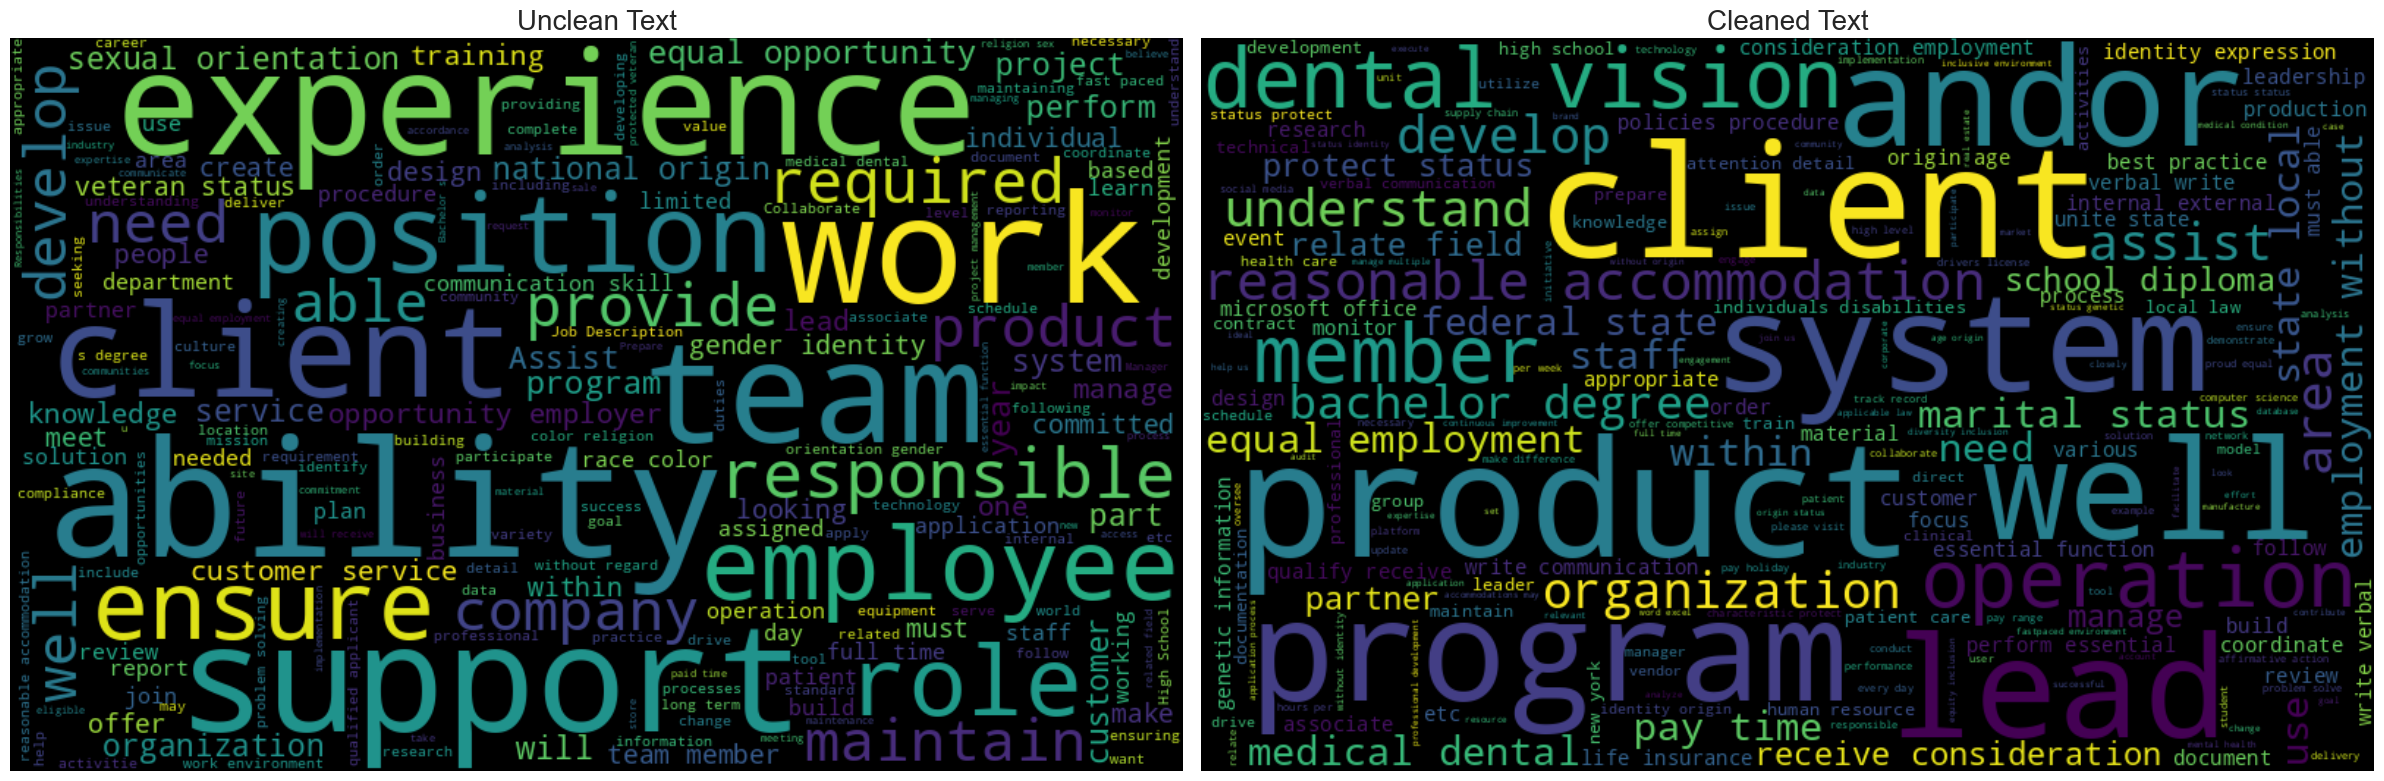

In [12]:
unclean = ' '.join([text for text in jobpostDF['description']])
clean = ' '.join([text for text in jobpostDF['description_cleaned']])

# Generate word clouds
wordcloud_unclean = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(unclean)
wordcloud_clean = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(clean)

plt.figure(figsize=(24, 9))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_unclean, interpolation="bilinear")
plt.title("Unclean Text", fontsize = 20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_clean, interpolation="bilinear")
plt.title("Cleaned Text", fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.savefig('wordclound.png', transparent=True, dpi=300)
plt.show()

**Key Insight 🎯** <br>
The word cloud visualizations highlight the most frequent words in the job descriptions. After cleaning, the word cloud is more focused, making it easier to identify key terms.

### 🏆 Top 10 Words

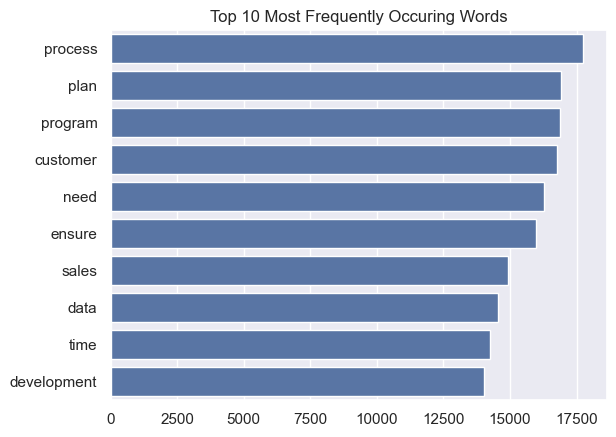

In [13]:
cnt = Counter()
for text in jobpostDF['description_cleaned'].values:
    for word in text.split():
        cnt[word] += 1

mostCommon = cnt.most_common(10)

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

**Key Insight 🎯** <br>
Here are the top 10 most frequently occurring words in our job descriptions. These words give us a quick overview of common job-related terms.

### 📊 N-Gram Analysis

In [14]:
def get_top_ngrams(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df
#collect n-gram for job description without Stop Word
unigrams = get_top_ngrams(jobpostDF['description_cleaned'], (1, 1),15)
bigrams = get_top_ngrams(jobpostDF['description_cleaned'], (2, 2), 15)
trigrams = get_top_ngrams(jobpostDF['description_cleaned'], (3, 3),15)
#collect n-gram for job description with Stop Word
unigrams_st = get_top_ngrams(jobpostDF['description_cleaned_st'], (1, 1),15)
bigrams_st = get_top_ngrams(jobpostDF['description_cleaned_st'], (2, 2),15)
trigrams_st = get_top_ngrams(jobpostDF['description_cleaned_st'], (3, 3),15)

🎭 N-Gram Theater: Before the Stop Word Purge

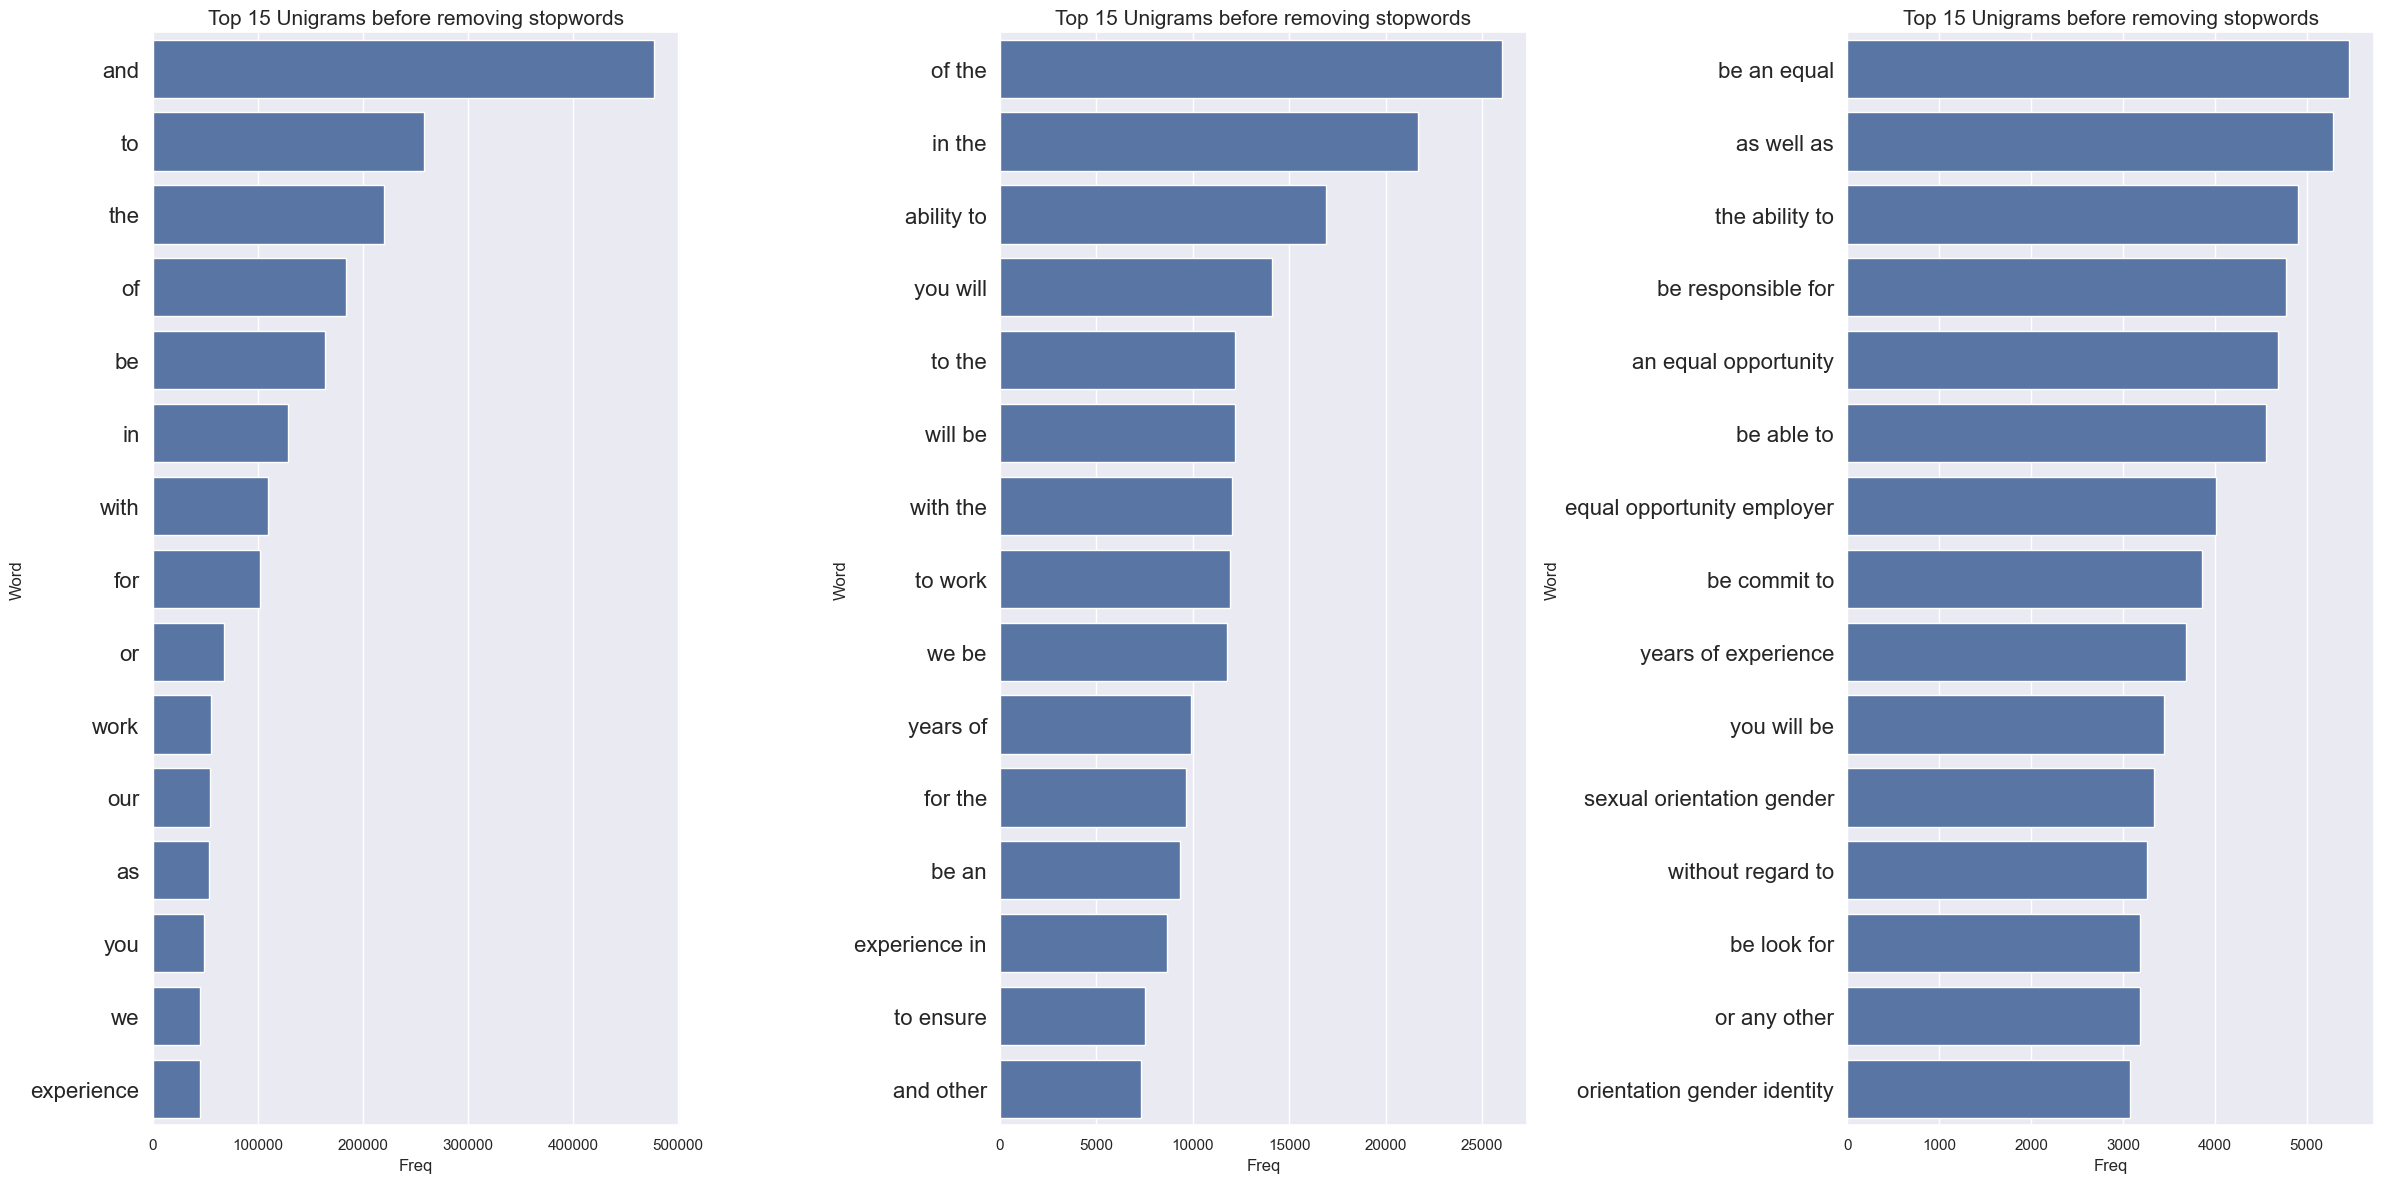

In [15]:
plt.figure(figsize=(24, 12))

plt.subplot(1,3,1)
sns.barplot(x='Freq', y='Word', data=unigrams_st)
plt.title('Top 15 Unigrams before removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.subplot(1,3,2)
sns.barplot(x='Freq', y='Word', data=bigrams_st)
plt.title('Top 15 Unigrams before removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.subplot(1,3,3)
sns.barplot(x='Freq', y='Word', data=trigrams_st)
plt.title('Top 15 Unigrams before removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('ngrambefore.png', transparent=True, dpi=300)
plt.show()


🚀 N-Gram Theater: The Sequel (Post Stop Word Exodus)

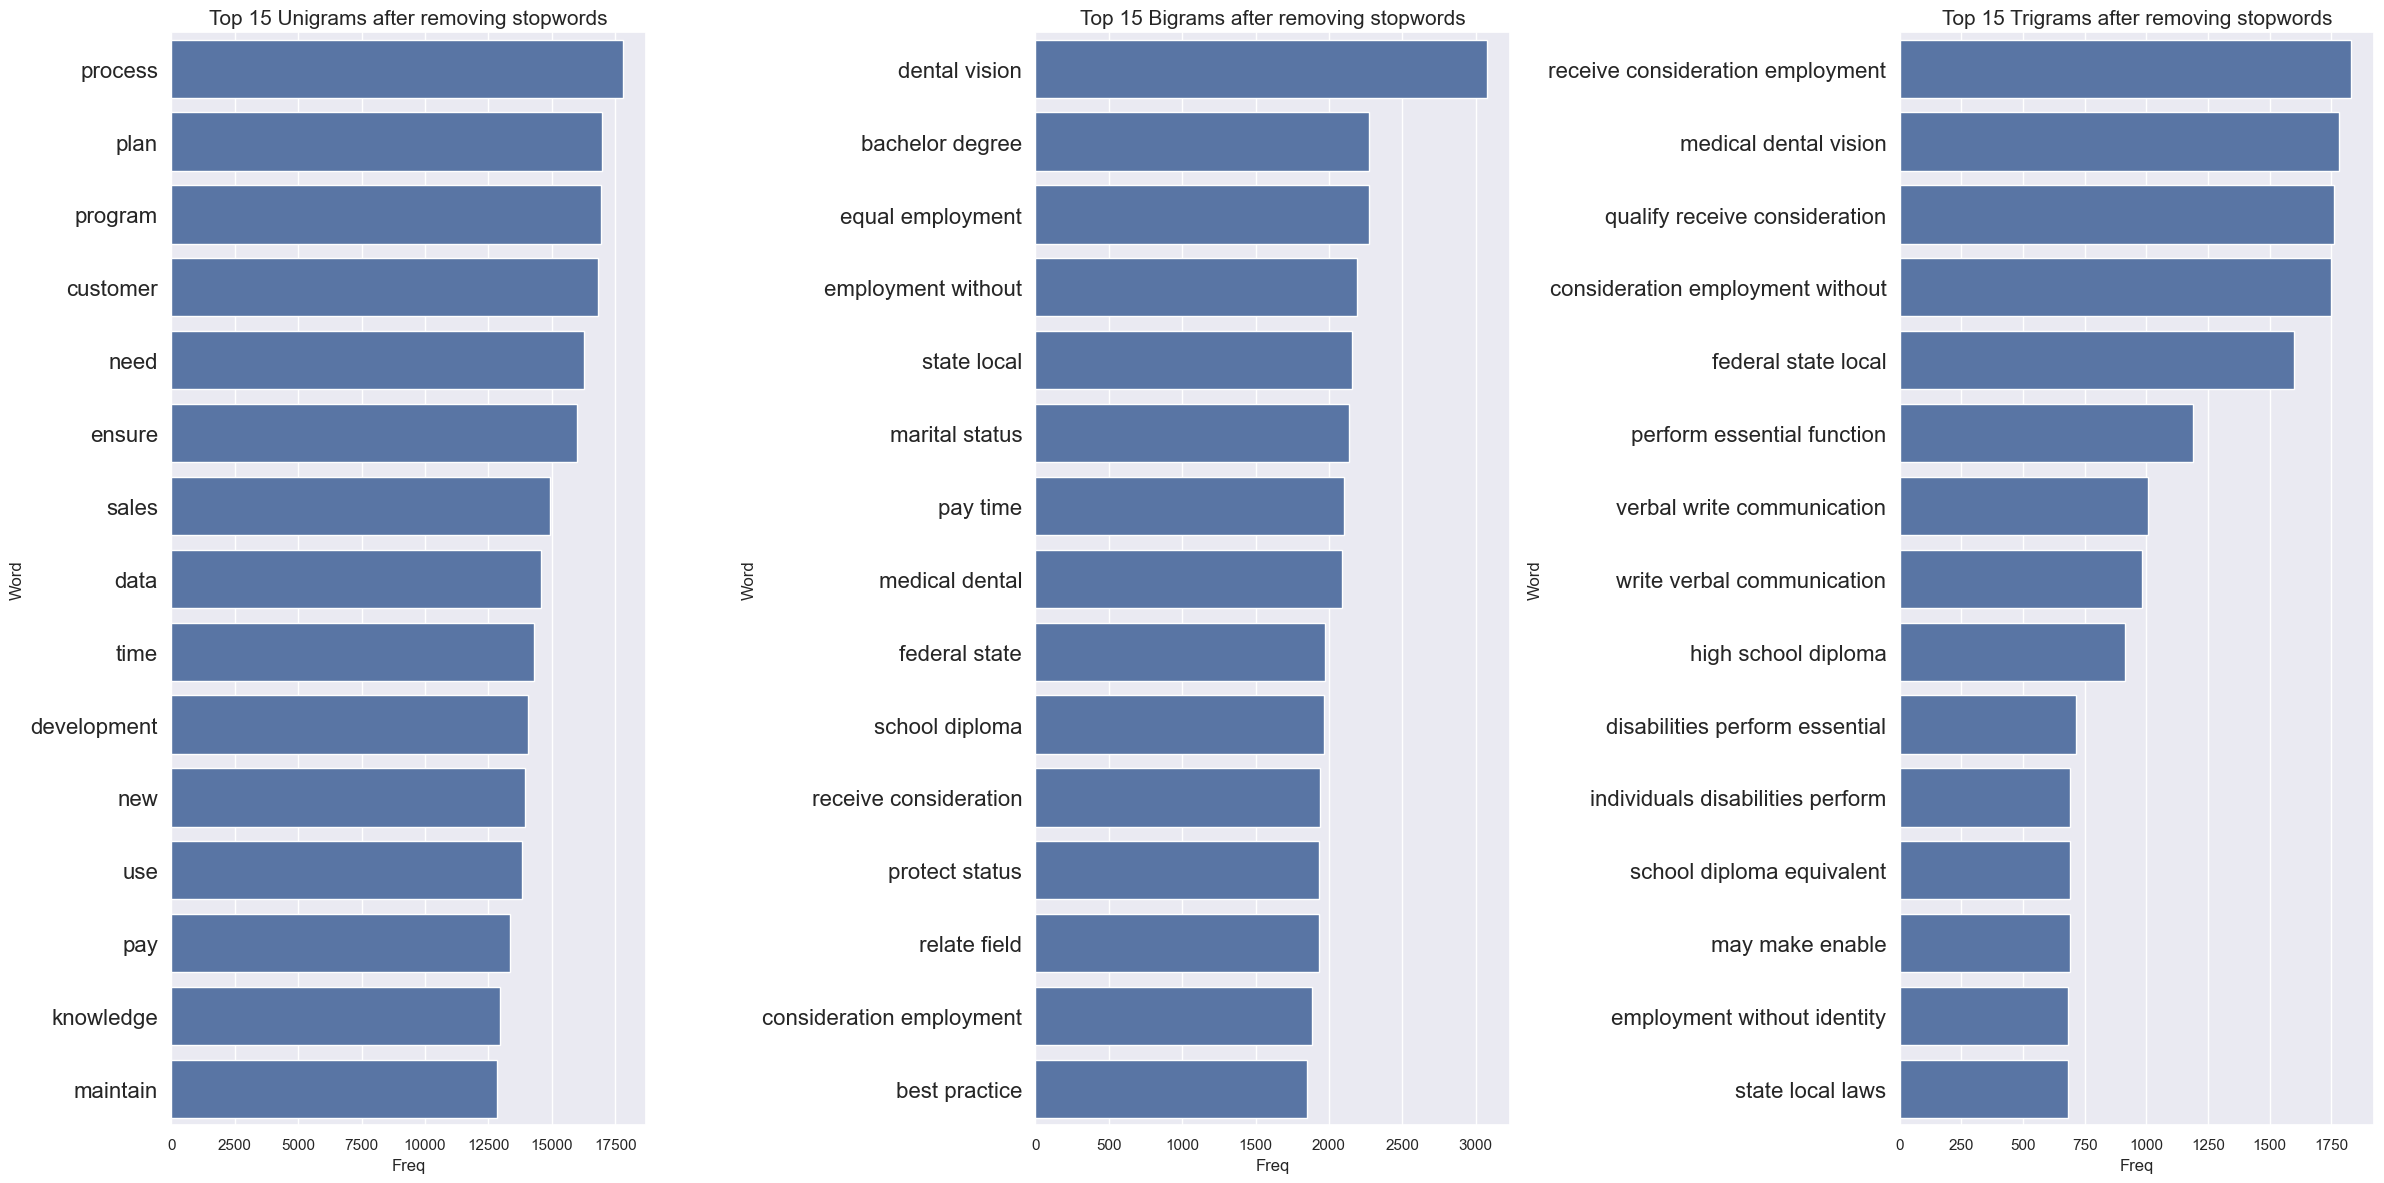

In [16]:
plt.figure(figsize=(24, 12))
plt.subplot(1,3,1)
sns.barplot(x='Freq', y='Word', data=unigrams)
plt.title('Top 15 Unigrams after removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.subplot(1,3,2)
sns.barplot(x='Freq', y='Word', data=bigrams)
plt.title('Top 15 Bigrams after removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.subplot(1,3,3)
sns.barplot(x='Freq', y='Word', data=trigrams)
plt.title('Top 15 Trigrams after removing stopwords', size=15)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('ngramafter.png', transparent=True, dpi=300)
plt.show()

The TF-IDF scores tell us that ADM skills revolve around managing offices and handling legal matters. DSGN skills are all about creativity in design and visuals. EDU skills focus on teaching and helping students. ENG skills deal with technical projects and manufacturing. FIN skills involve managing finances and budgets. HCPR skills center on patient care and medical treatments. MRKT skills are about marketing, branding, and customer engagement. OTHR skills manage operations and support systems. PRDM skills focus on product development and innovation. Finally, RSCH skills are all about research and data analysis. These insights help make job descriptions more accurate and improve job matching. 🌟💼

📊 The Great N-Gram Count-Off

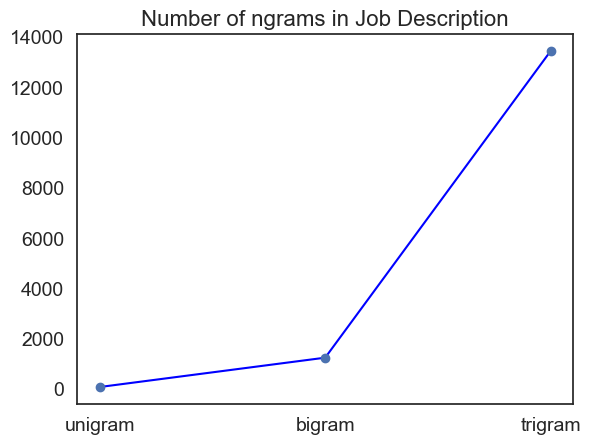

In [17]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, token_pattern=None)
x = bow_converter.fit_transform(jobpostDF['description_cleaned'])
words = bow_converter.get_feature_names_out()

bigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(2,2), lowercase=False, token_pattern=None) 
x2 = bigram_converter.fit_transform(jobpostDF['description_cleaned'])
bigrams = bigram_converter.get_feature_names_out()

trigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(3,3), lowercase=False, token_pattern=None) 
x3 = trigram_converter.fit_transform(jobpostDF['description_cleaned'])
trigrams = trigram_converter.get_feature_names_out()

sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in Job Description', {'fontsize':16})
plt.savefig('ngramcount.png', transparent=True, dpi=300)
plt.show()


**Key Insight 🎯** <br>
N-gram analysis helps us understand common word combinations in job descriptions. This can reveal typical phrases used in job postings.

# 💼 Job Skills Data: The New Challenger Approaches

In [18]:
jobskillsDF = pd.read_csv('job_skills.csv')
jobskillsDF.head()

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


In [19]:
jobskillsDF.isnull().sum()
jobskillsDF = jobskillsDF.dropna(subset='skill_abr')
jobskillsDF.shape

(27899, 2)

### 📊 The Job Skills Popularity Contest

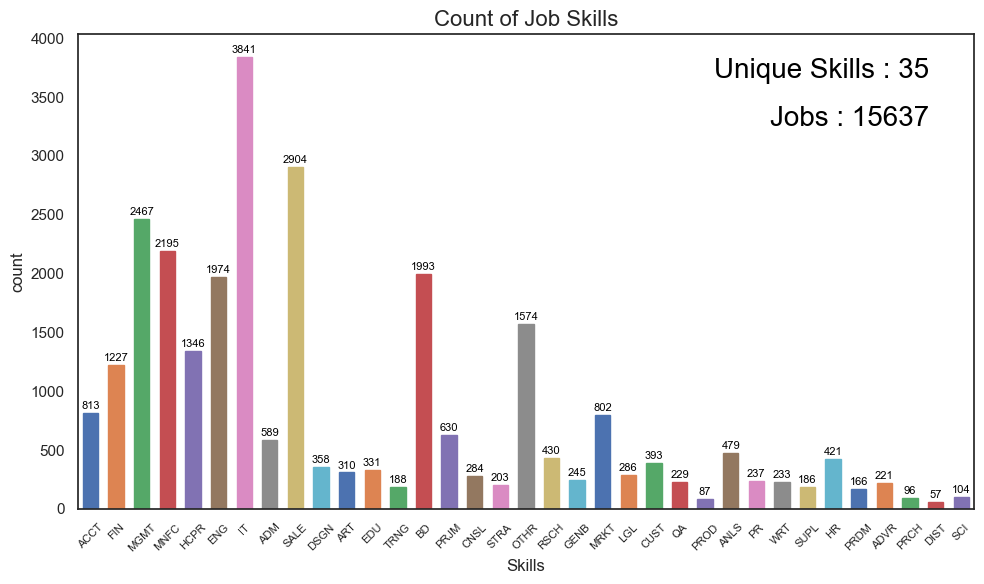

In [20]:
plt.figure(figsize=(10, 6), facecolor='none')
ax = sns.countplot(x=jobskillsDF['skill_abr'], width=0.6)

palette = sns.color_palette("deep", len(ax.patches))
for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

unique_skills = jobskillsDF['skill_abr'].nunique()
ax.text(0.95, 0.95, f'Unique Skills : {unique_skills}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

unique_jobs = jobskillsDF['job_id'].nunique()
ax.text(0.95, 0.85, f'Jobs : {unique_jobs}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

ax.set_facecolor('none')

plt.title('Count of Job Skills', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
ax.set_xlabel("Skills")
plt.tight_layout()
plt.savefig('transparent_countplot.png', transparent=True)  # Save with transparent background
plt.show()


### 🎭 The Great Skill Regrouping Act

In [21]:
#Grouping Skill to 10 Skill 
skill_mapping = { 'ADM': 'ADM', #1.Administration
                 'CNSL': 'ADM',
                  'HR': 'ADM',
                  'LGL': 'ADM',
                  'MGMT': 'ADM',
                  'PRJM':'ADM',
                  'ACCT':'FIN', #2.Business and Finace
                  'CUST':'FIN',
                  'DIST':'FIN',
                  'FIN':'FIN',
                  'PRCH':'FIN',
                  'SALE':'FIN',
                  'STRA':'FIN',
                  'SUPL':'FIN',
                  'BD':'FIN',
                  'GENB':'FIN',
                  'ART':'DSGN', #3.Creative and Design
                  'DSGN':'DSGN',
                  'WRT':'DSGN',
                  'EDU':'EDU', #4.Education
                  'TRNG':'EDU',
                  'ENG':'ENG',#5.Engineering
                  'IT':'ENG',
                  'MNFC':'ENG',
                  'HCPR':'HCPR',#6.Healthcare
                  'ADVR':'MRKT',#7.Marketing and Advertising
                  'MRKT':'MRKT',
                  'PR':'MRKT',
                  'PRDM':'PRDM',#8.Product Development
                  'ANLS':'RSCH',#9.Research and Science
                  'SCI':'RSCH',
                  'RSCH':'RSCH',
                  'QA':'RSCH',
                  'PROD':'PROD'}#10.Project Management
jobskillsDF['skill_abr_regroup'] = jobskillsDF['skill_abr'].replace(skill_mapping)

In [22]:
#Remove duplicate row because 1 job may have multi skill but after grouping skill it can be the same skill
jobskillsDF = jobskillsDF.drop_duplicates(subset=['job_id', 'skill_abr_regroup'])
print(jobskillsDF.shape)

(22027, 3)


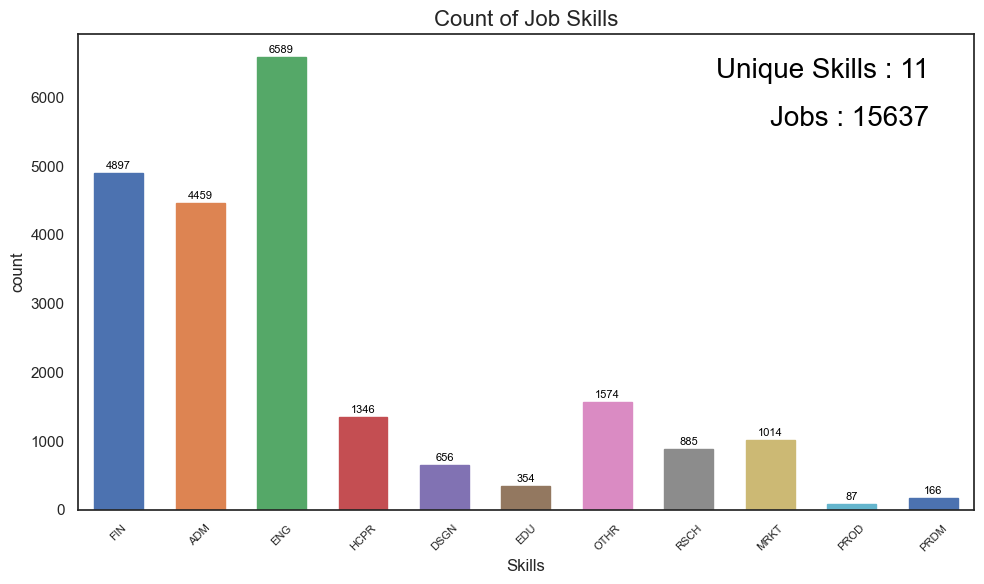

In [23]:
plt.figure(figsize=(10, 6), facecolor='none') 
ax = sns.countplot(x=jobskillsDF['skill_abr_regroup'], width=0.6)

palette = sns.color_palette("deep", len(ax.patches))
for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

unique_skills_regroup = jobskillsDF['skill_abr_regroup'].nunique()
ax.text(0.95, 0.95, f'Unique Skills : {unique_skills_regroup}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

unique_jobs_regroup = jobskillsDF['job_id'].nunique()
ax.text(0.95, 0.85, f'Jobs : {unique_jobs_regroup}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

ax.set_facecolor('none')  

plt.title('Count of Job Skills', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
ax.set_xlabel("Skills")
plt.tight_layout()
plt.savefig('transparent_countplot_regroup.png', transparent=True)  
plt.show()


### 🔄 Merging Worlds: Job Descriptions Meet Skills

- Create Multi-Label for Job Skill (1 Job : Multi Skill)

In [24]:
multiskillDF = pd.merge(jobpostDF, jobskillsDF, on='job_id', how='inner') # merge skill type with description mathc by job id
multiskillDF = multiskillDF.groupby('job_id').agg({'description_cleaned': 'first', 'skill_abr_regroup': ','.join}).reset_index()
multiskillDF['skill_count'] = multiskillDF['skill_abr_regroup'].str.split(',').apply(len)
multiskillDF['skill_abr_regroup'] = multiskillDF['skill_abr_regroup'].str.split(',').tolist()
multiskillDF.head()

,job_id,description_cleaned,skill_abr_regroup,skill_count
0,85008768,many industries hurt last people still need in...,[FIN],1
1,133114754,dynamic creative market professional look make...,[FIN],1
2,133196985,join us model risk auditor showcase financial ...,[FIN],1
3,529257371,could one magic fulk inc seek studio assistant...,"[DSGN, ENG]",2
4,903408693,clerical administrative requestedanswer phone ...,[ADM],1


/var/folders/df/fj9fp3kj3_9c8vqsxd94_clh0000gn/T/ipykernel_87945/2491207758.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


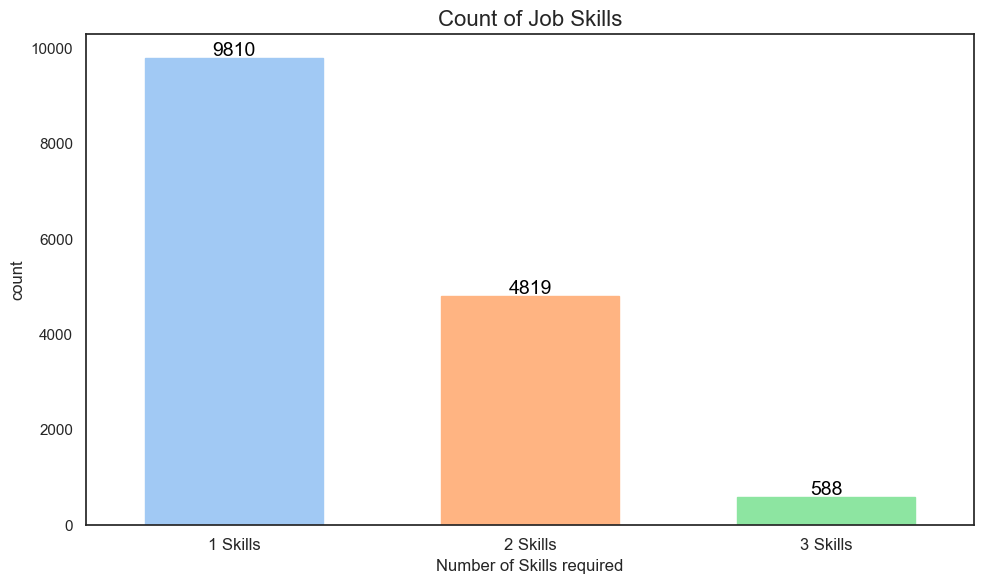

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=multiskillDF['skill_count'], width=0.6)

palette = sns.color_palette("pastel", len(ax.patches))
for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

labels = [f"{int(label) + 1} Skills" for label in ax.get_xticks()]
ax.set_xticklabels(labels)

plt.title('Count of Job Skills', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
ax.set_xlabel("Number of Skills required")
plt.tight_layout()
plt.show()

- Creat Single Label for Job Skill Dataframe to Meansure TF-IDF Score of Each Job Skill

In [26]:
oneskillDF = multiskillDF[multiskillDF['skill_count'] == 1].copy()
oneskillDF['skill_abr_regroup'] = oneskillDF['skill_abr_regroup'].str.join('')
print(oneskillDF.shape)

(9810, 4)


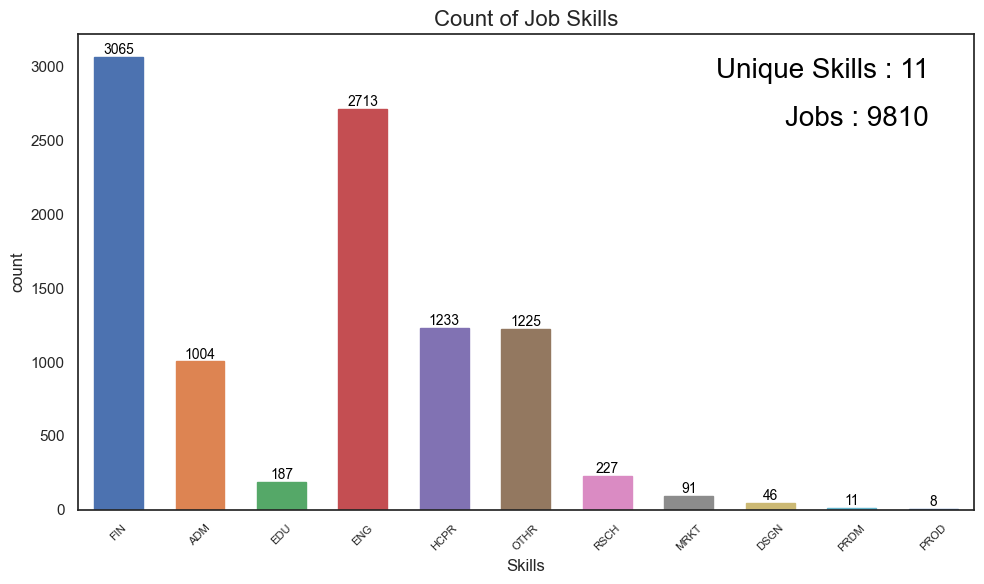

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=oneskillDF['skill_abr_regroup'], width=0.6)

palette = sns.color_palette("deep", len(ax.patches))
for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

nu_skill = oneskillDF['skill_abr_regroup'].nunique()
ax.text(0.95, 0.95, f'Unique Skills : {nu_skill}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

jobs = oneskillDF['job_id'].nunique()
ax.text(0.95, 0.85, f'Jobs : {jobs}', transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', fontsize=20, color='Black')

plt.title('Count of Job Skills', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
ax.set_xlabel("Skills")
plt.tight_layout()
plt.savefig('transparent_skill_count_single_plot.png', transparent=True, dpi=300)  
plt.show()

### TF-IDF Score of Job Description and Skills

Prepare for some serious word math! 🧮✨ We're breaking out the TF-IDF vectorizer to see which words are the real MVPs in our job descriptions. It's like giving words their own credit scores! 💯📝

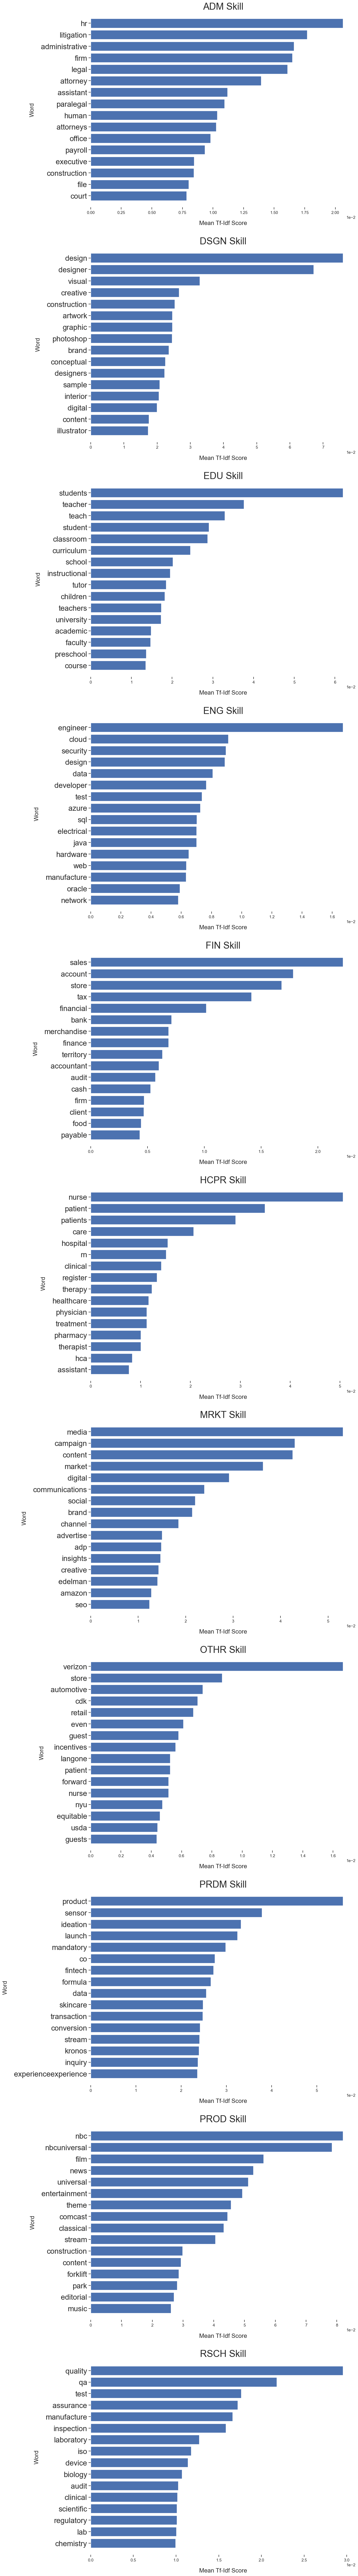

In [28]:
tfidf_vectorizor = TfidfVectorizer(min_df=5, 
                             max_df=0.5,
                             analyzer='word',
                             strip_accents='unicode',
                             ngram_range=(1, 1),
                             sublinear_tf=True, 
                             smooth_idf=True,
                             use_idf=True)
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=20):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=16):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs, num_class=9):
    num_class = len(dfs)
    fig = plt.figure(figsize=(12, num_class*10), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(num_class, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title(str(df.label) + ' Skill', fontsize=25)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        
        for tick in ax.yaxis.get_major_ticks():
                tick.label1.set_fontsize(20) 
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

tfidf_vectorizor.fit(list(oneskillDF['description_cleaned']))

class_Xtr = tfidf_vectorizor.transform(oneskillDF['description_cleaned'])
class_y = oneskillDF['skill_abr_regroup']
class_features = tfidf_vectorizor.get_feature_names_out()
class_top_dfs = top_feats_by_class(class_Xtr, class_y, class_features)
plot_tfidf_classfeats_h(class_top_dfs, 10)


# Feature Extraction with N-gram and TF-TDF

In [30]:
count_vect = CountVectorizer(ngram_range=(1, 2))
tfidf_vectorizor = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),smooth_idf=True)

# 🛠️ Model Building
## 🧠 Logistic Regression

Tuning Hyperparameter for ***Navie Bayes with TF-IDF method***

In [31]:
# mnb_model = MultiOutputClassifier(MultinomialNB())
# alpha = [0.1,0.3,0.5]
# paramgrid = {'estimator__alpha':alpha}
# gsearch_cv = GridSearchCV(mnb_model, param_grid=paramgrid, cv=5)
# gsearch_cv.fit(x_train_tfidf, y_train)

# best_alpha = gsearch_cv.best_params_['estimator__alpha']
# print(f"Best alpha: {best_alpha}")

# mean_test_scores = gsearch_cv.cv_results_['mean_test_score']
# plt.plot(alpha, mean_test_scores, marker='o')
# plt.xlabel('Alpha')
# plt.ylabel('Mean Test Score (Accuracy)')
# plt.title('Alpha vs. Mean Test Score')
# plt.grid(True)
# plt.show()

Logistic Regression + One Vs Rest

In [32]:
def LR_classify(X_tr, y_tr, X_test, y_test, description):
    model = OneVsRestClassifier(LogisticRegression(max_iter=500)).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    
    #Classification Report
    clf_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.title("Logistic Regression Classification ({}) Accuracy Rate: {:.2f}%".format(description, accuracy_score(y_test, y_pred)*100))
    plt.show()
    
    scores = cross_val_score(model, X_tr, y_tr, cv=5)
    print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*200))
    

    plt.figure(figsize=(10, 6))
    plt.plot(scores, '-o', label='Cross-Validation Scores')
    plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean Score')
    plt.title('Cross-Validation Scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    
    cm = confusion_matrix(y_test, y_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    plt.show()
    return model

## 💪🏼 Naive Bayes

In [33]:
def NB_classify(X_tr, y_tr, X_test, y_test, description):
    model = MultinomialNB(alpha=0.1).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    
    #Classification Report
    clf_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.title("Naive Bayes Classification ({}) Accuracy Rate: {:.2f}%".format(description, accuracy_score(y_test, y_pred)*100))
    plt.show()
    
    scores = cross_val_score(model, X_tr, y_tr, cv=5)
    print("Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean()*100, scores.std()*200))
    

    plt.figure(figsize=(10, 6))
    plt.plot(scores, '-o', label='Cross-Validation Scores')
    plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean Score')
    plt.title('Cross-Validation Scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    
    cm = confusion_matrix(y_test, y_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    plt.show()
    return model

## 📚 Models and Feature Engineering Techniques

### 1. Logistic Regression with Bag of Words
This model uses the Bag of Words (BoW) representation of job descriptions as features to predict job skills. BoW converts the text into a matrix of token counts, which is then used to train the logistic regression model.

#### 2. Logistic Regression with TF-IDF
This model uses the TF-IDF (Term Frequency-Inverse Document Frequency) representation of job descriptions as features. TF-IDF reflects the importance of a word in a document relative to the corpus, which helps in improving the performance of the model.

#### 3. Naive Bayes with Bag of Words
This model also uses the Bag of Words representation, but employs a Naive Bayes classifier instead of logistic regression. Naive Bayes is based on applying Bayes' theorem with strong independence assumptions between features.

#### 4. Naive Bayes with TF-IDF
This approach uses the TF-IDF representation for the Naive Bayes classifier. TF-IDF is effective in emphasizing the significant terms in the job descriptions.


### Classification

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(oneskillDF['description_cleaned'],oneskillDF['skill_abr_regroup'], test_size = 0.20, random_state = 60)

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizor.fit_transform(X_train)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_vectorizor.transform(X_test)

print ("Bag of Word Shape :",X_train_counts.shape,X_test_counts.shape, Y_train.shape, Y_test.shape)
print ("TF-IDF Shape :",X_test_counts.shape,X_test_tfidf.shape, Y_train.shape, Y_test.shape)


Bag of Word Shape : (7848, 814544) (1962, 814544) (7848,) (1962,)
TF-IDF Shape : (1962, 814544) (1962, 95060) (7848,) (1962,)


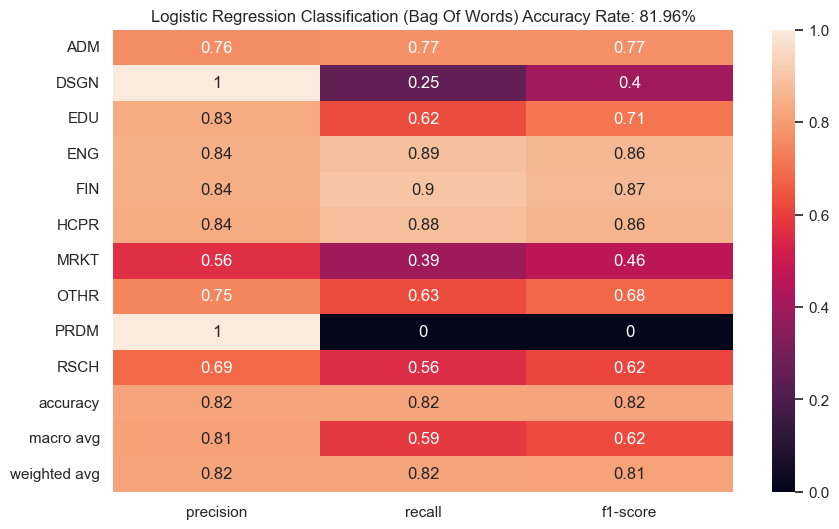

Accuracy: 81.17% (+/- 2.23%)


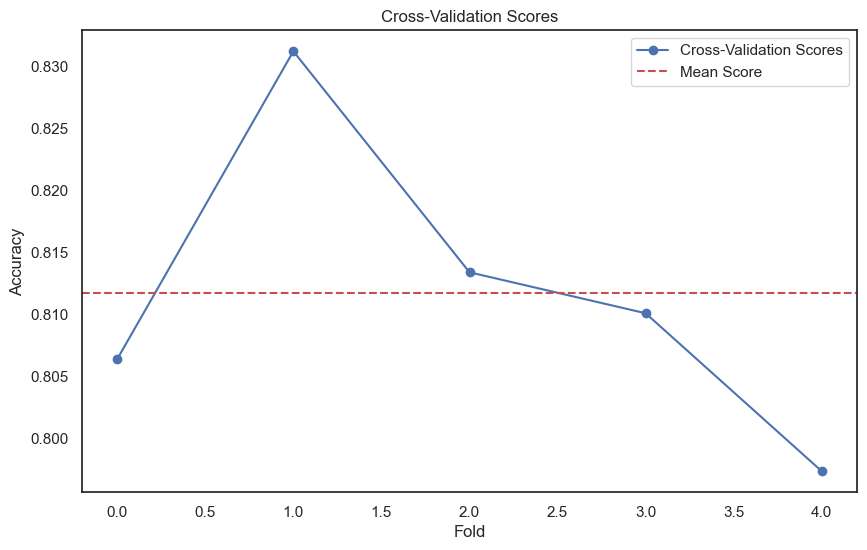

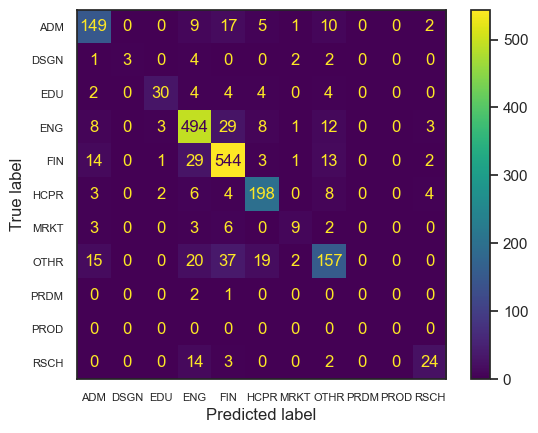

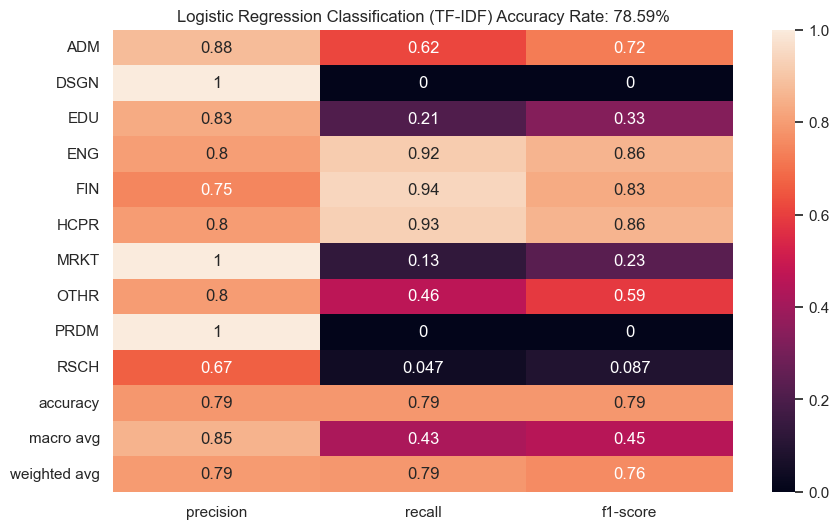

Accuracy: 77.91% (+/- 1.67%)


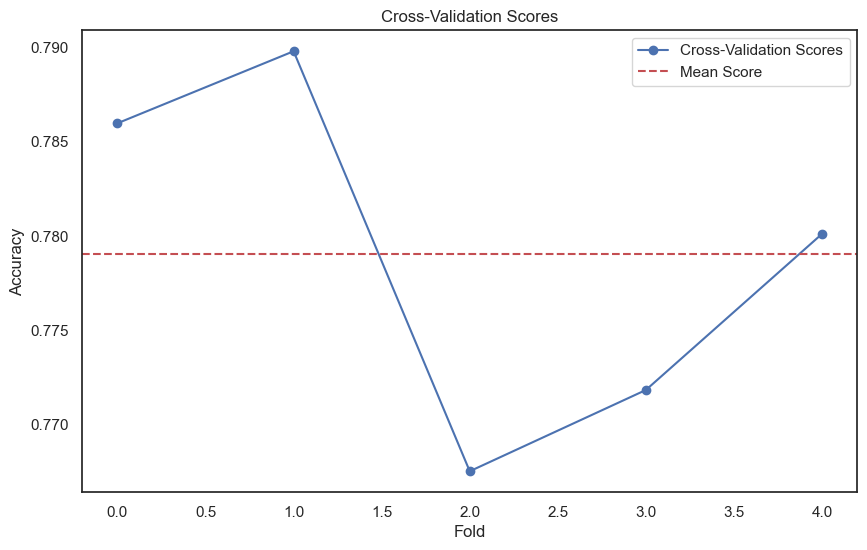

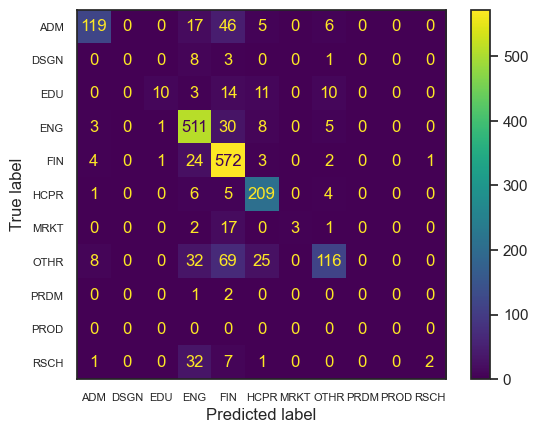

In [35]:
#Logistic Regression
one_LR_model_bow = LR_classify(X_train_counts, Y_train, X_test_counts, Y_test, 'Bag Of Words')
one_LR_model_tfidf = LR_classify(X_train_tfidf, Y_train, X_test_tfidf, Y_test, 'TF-IDF')

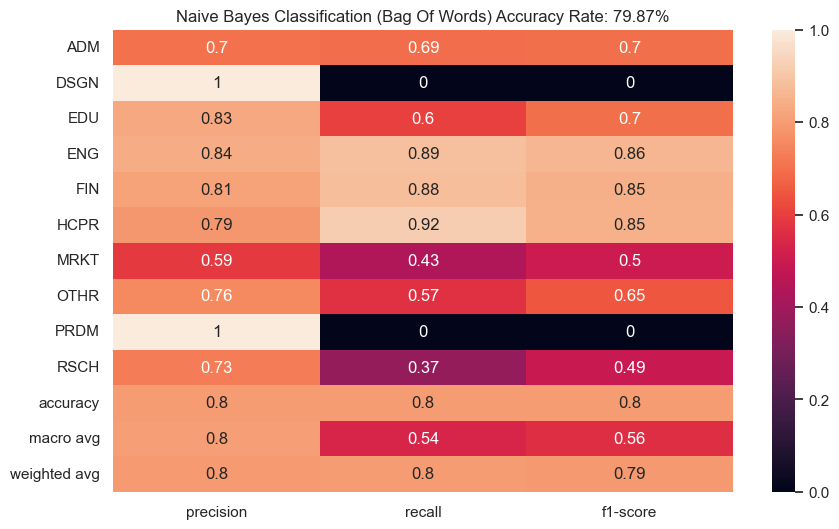

Accuracy: 73.47% (+/- 1.86%)


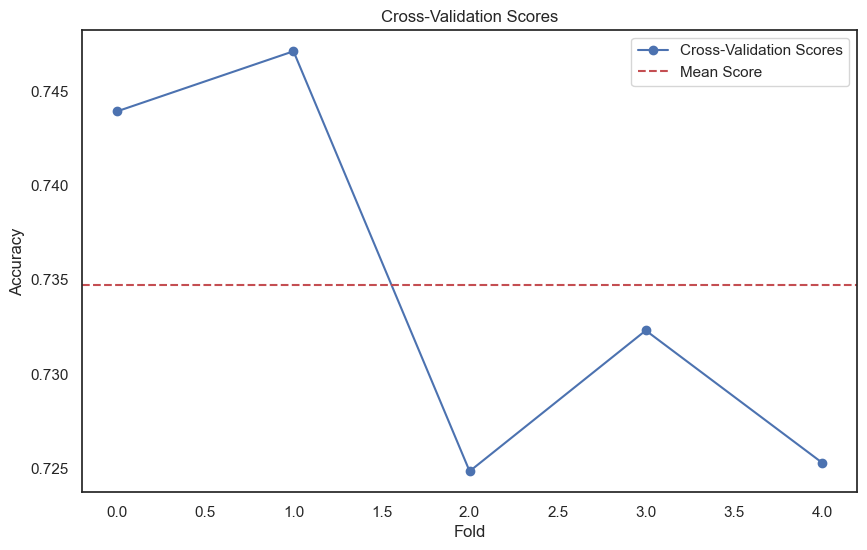

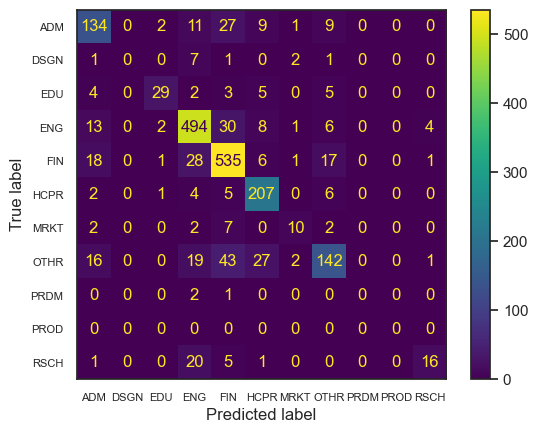

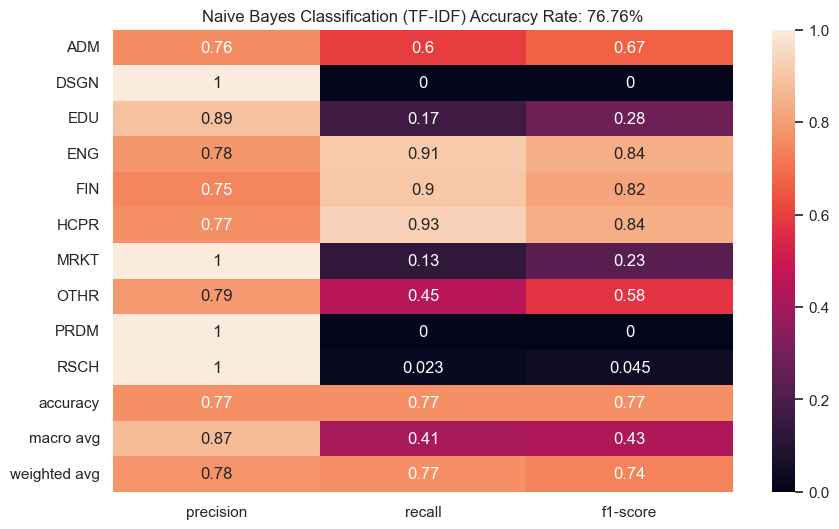

Accuracy: 77.52% (+/- 2.00%)


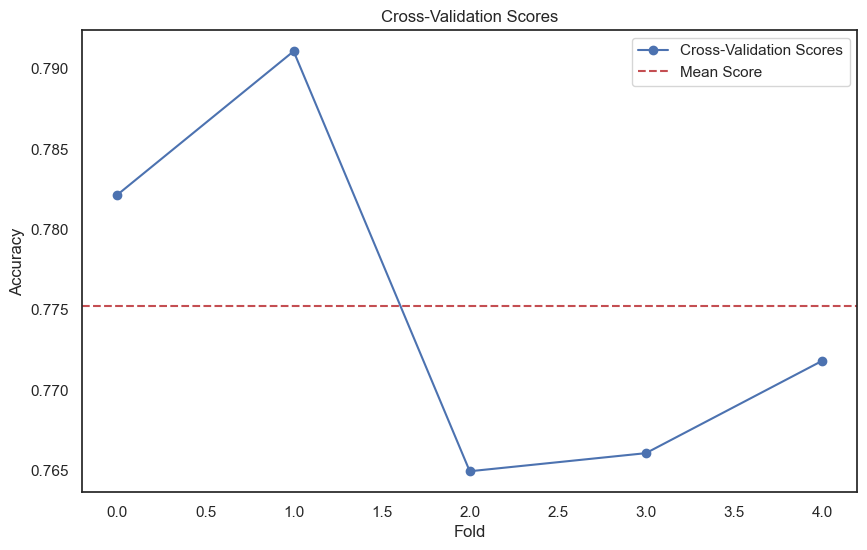

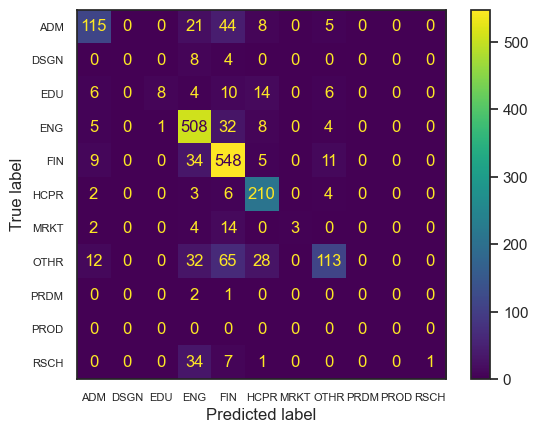

In [36]:
#Naive Bayes
one_NB_model_bow = NB_classify(X_train_counts, Y_train, X_test_counts, Y_test, 'Bag Of Words')
one_NB_model_tfidf = NB_classify(X_train_tfidf, Y_train, X_test_tfidf, Y_test, 'TF-IDF')


## 🧩 Interpretation of Results

### Logistic Regression
- The Logistic Regression model with BoW has the highest accuracy of 81.17%, indicating it performs well with token counts as features.
- The model with TF-IDF achieves a slightly lower accuracy (77.91%), but TF-IDF helps in capturing important terms, making the model robust.

### Naive Bayes
- The Naive Bayes model with BoW shows a lower accuracy (73.47%) compared to Logistic Regression.
- However, using TF-IDF with Naive Bayes improves the accuracy to 77.52%, highlighting the effectiveness of TF-IDF in enhancing model performance.

### Overall Insights
- **Feature Engineering Matters**: Both models (Logistic Regression and Naive Bayes) perform better with TF-IDF compared to BoW, showing the importance of selecting appropriate feature representations.
- **Model Choice**: Logistic Regression generally outperforms Naive Bayes in this task, indicating it handles the complexity of job descriptions better.

## 📊 Visualizations and Metrics

- **Confusion Matrices**: Visualize the distribution of true vs. predicted labels for each model and feature engineering technique.
- **Classification Reports**: Provide detailed metrics (precision, recall, f1-score) for evaluating the performance of each model.

# 🎉 Conclusion: Our Epic NLP Job Classification Journey 🚀

Hey there, data enthusiasts! 🌟

After diving deep into the world of job descriptions and skills, we emerged victorious with some fascinating insights and powerful models. Here's the lowdown on our adventure:

### Key Takeaways

- **Text Cleaning**: We scrubbed our text squeaky clean, making it ready for analysis. 🧼✨
- **Visualizations**: From word clouds to n-gram analysis, our visualizations painted a clear picture of the job description landscape. 🎨🔍
- **Model Building**: We built robust logistic regression and Naive Bayes models using Bag of Words and TF-IDF features. 🧠📈

### Performance Highlights

- **Logistic Regression**:
  - **Bag of Words (BoW)**: Achieved the highest accuracy of **81.17%**.
  - **TF-IDF**: Slightly lower accuracy at **77.91%**, but still impressive.
- **Naive Bayes**:
  - **Bag of Words (BoW)**: Accuracy of **73.47%**.
  - **TF-IDF**: Improved accuracy of **77.52%**.

Overall, logistic regression outperformed Naive Bayes, especially with BoW features, showcasing the importance of feature selection in model performance. 🥇

### Future Work

- **Model Improvement**: Explore advanced models like neural networks and ensemble methods to boost accuracy further. 🚀
- **Feature Engineering**: Experiment with more sophisticated feature extraction techniques, including word embeddings and contextualized embeddings (e.g., BERT). 🧠
- **Data Augmentation**: Increase the dataset size with synthetic data to enhance model robustness. 📈
- **Real-time Classification**: Implement a real-time job classification system for dynamic job postings. ⏱️

This project was a rollercoaster of fun and learning! 🎢 By harnessing the power of NLP, we turned messy job descriptions into actionable insights, proving that data science can make a real impact. Keep exploring, keep experimenting, and most importantly, keep having fun with data! 🎉🚀

Stay awesome,
Putanyn Manee 😎✨
